In [101]:
import pandas as pd
df = pd.read_csv('AAPL.csv')

In [102]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


In [103]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10409 entries, 0 to 10408
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10409 non-null  object 
 1   Open       10409 non-null  float64
 2   High       10409 non-null  float64
 3   Low        10409 non-null  float64
 4   Close      10409 non-null  float64
 5   Adj Close  10409 non-null  float64
 6   Volume     10409 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 569.4+ KB
None


In [104]:
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [105]:
df['Date']=pd.to_datetime(df['Date'])

In [106]:
df = df.sort_values('Date')

In [107]:
df.set_index('Date',inplace=True)

In [108]:
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10409 entries, 1980-12-12 to 2022-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10409 non-null  float64
 1   High       10409 non-null  float64
 2   Low        10409 non-null  float64
 3   Close      10409 non-null  float64
 4   Adj Close  10409 non-null  float64
 5   Volume     10409 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 569.2 KB


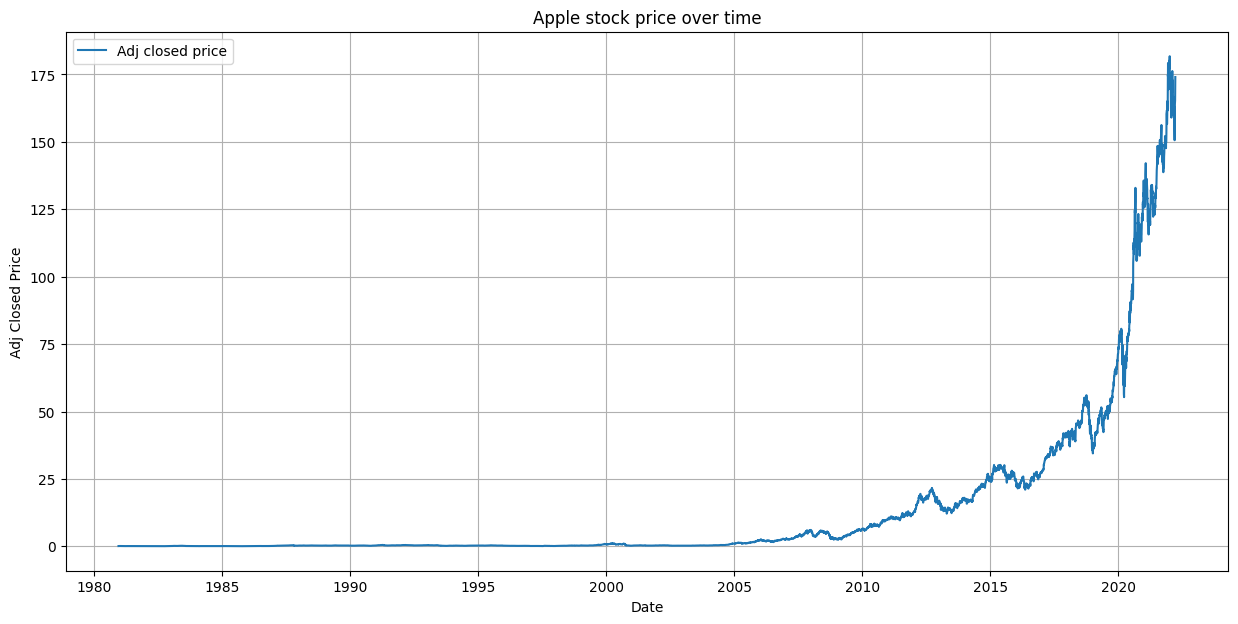

In [110]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
plt.plot(df['Adj Close'],label="Adj closed price")
plt.title('Apple stock price over time')
plt.xlabel("Date")
plt.ylabel("Adj Closed Price")
plt.legend()
plt.grid()
plt.show()

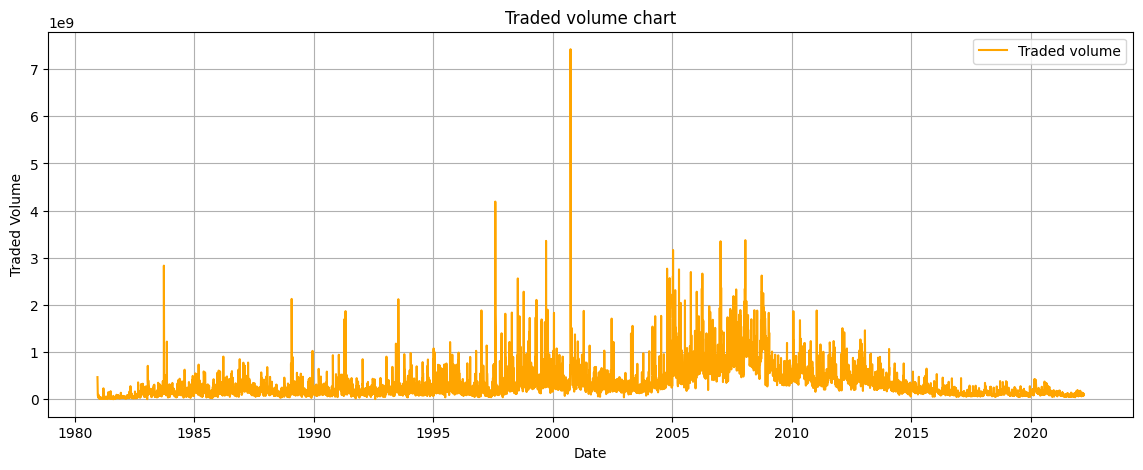

In [111]:
plt.figure(figsize=(14,5))
plt.title('Traded volume chart')
plt.plot(df['Volume'],color='orange',label='Traded volume')
plt.xlabel('Date')
plt.ylabel('Traded Volume')
plt.legend()
plt.grid(True)
plt.show()

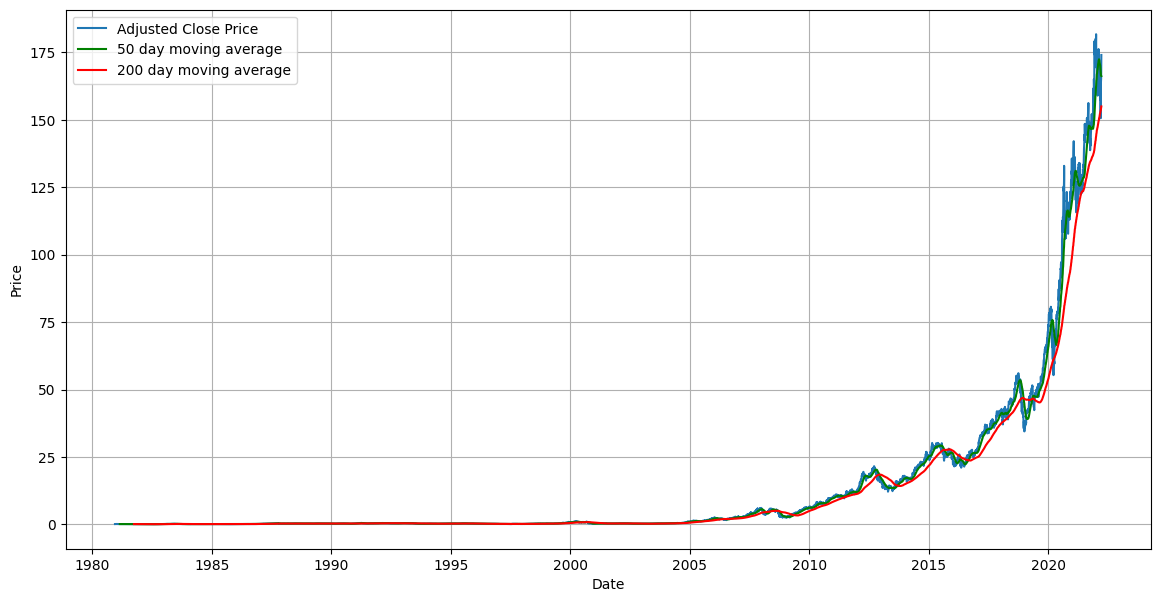

In [112]:
df['SMA50']=df['Adj Close'].rolling(50).mean()
df['SMA200']=df['Adj Close'].rolling(200).mean()
plt.figure(figsize=(14,7))
plt.plot(df['Adj Close'],label='Adjusted Close Price')
plt.plot(df['SMA50'],label='50 day moving average',color='green')
plt.plot(df['SMA200'],label='200 day moving average',color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [113]:
last_5_years=df[df.index >= '2019-01-01']

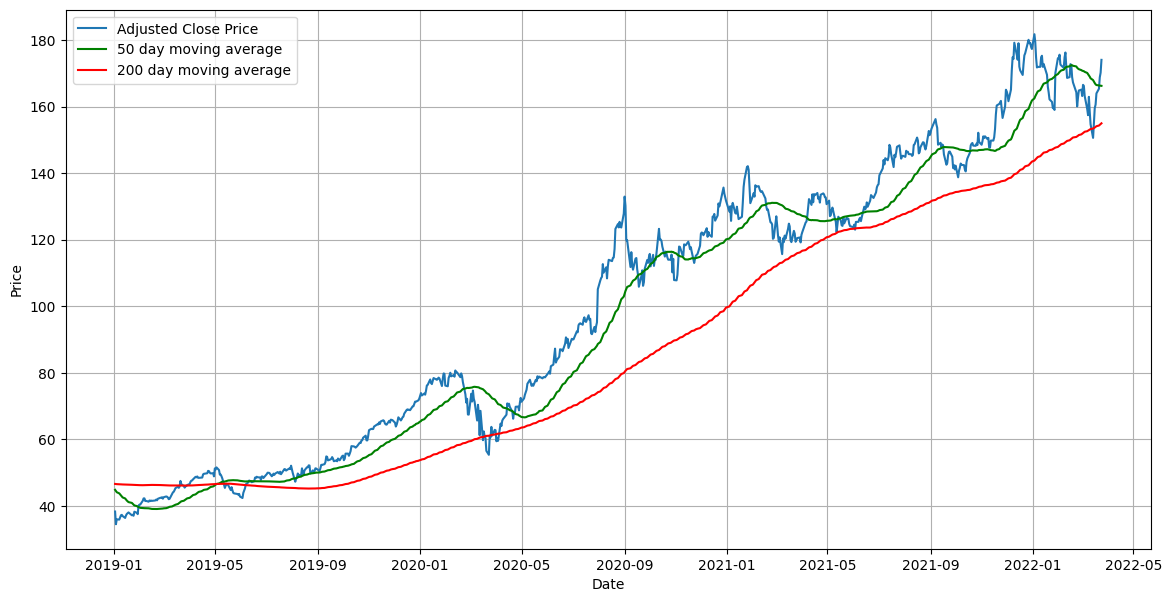

In [114]:
df['SMA10']=df['Adj Close'].rolling(10).mean()
df['SMA50']=df['Adj Close'].rolling(50).mean()
df['SMA200']=df['Adj Close'].rolling(200).mean()
plt.figure(figsize=(14,7))
plt.plot(last_5_years['Adj Close'],label='Adjusted Close Price')
plt.plot(last_5_years['SMA50'],label='50 day moving average',color='green')
plt.plot(last_5_years['SMA200'],label='200 day moving average',color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

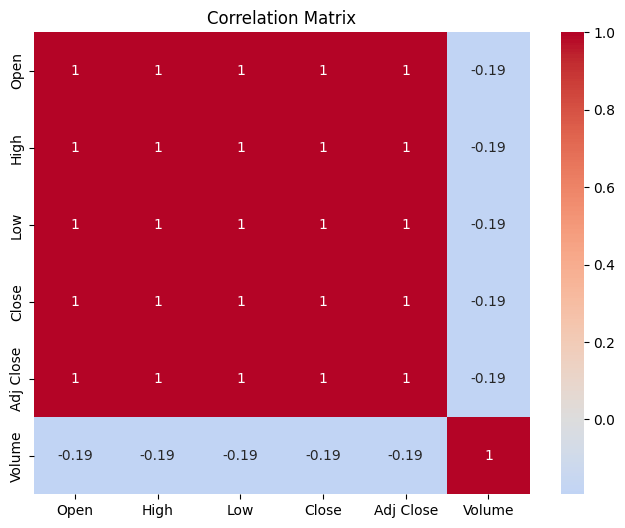

In [115]:
import seaborn as sns
corr_matrix = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',center=0)
plt.title('Correlation Matrix')
plt.show()

In [116]:
# Here in this ML project what I want to create is a  model that can check if you but a apple stock on some specific day will it give 25% return within 360 days of buying it
# Here the output is binary so if for specific day it is showing 1 (Buy) than you can but apple stock and expect to get 25% return witing next 360 days else it will say 0 (Don't buy)

# What I did here is created a new column full of 0's and 1's (There is 0 in the row of some day is when buying the apple stock on that day would'nt give you 25% within a year)
# Moreover 1 indicates if you buyed apple stock on that specific day, you have achieved 25% within 360 days
future_max=df['Adj Close'].shift(-1).rolling(window=360).max()
df['Target']=(future_max >= df['Adj Close']*1.25).astype(int)
print(df['Target'].value_counts())


Target
0    6028
1    4381
Name: count, dtype: int64


In [117]:
# Now we are making lab features
# We need some features that can help us to predict whether that is 0 or 1 day


# 1 day return
df['Return_1d']=df['Adj Close'].pct_change(1)
# 5 days return
df['Return_5d']=df['Adj Close'].pct_change(5)
# volume changes from the previous day
df['Volume_change_1d']=df['Volume'].pct_change(1)
# Price to moving average (10,50,200)
df['Price_SMA_10_ratio']= df['Adj Close'] / df['SMA50']
df['Price_SMA_50_ratio'] = df['Adj Close'] / df['SMA50']
df['Price_SMA_200_ratio'] = df['Adj Close'] / df['SMA200']





In [118]:
df[['Return_1d', 'Return_5d', 'Volume_change_1d', 'Price_SMA_10_ratio', 'Price_SMA_50_ratio', 'Price_SMA_200_ratio']].tail()


,Return_1d,Return_5d,Volume_change_1d,Price_SMA_10_ratio,Price_SMA_50_ratio,Price_SMA_200_ratio
Date,,,,,,
2022-03-18,0.020919,0.059782,0.631297,0.984857,0.984857,1.063974
2022-03-21,0.008538,0.097995,-0.223263,0.994030,0.994030,1.071667
2022-03-22,0.020801,0.088529,-0.149037,1.015088,1.015088,1.092420
2022-03-23,0.008234,0.066546,0.202751,1.023663,1.023663,1.099849
2022-03-24,0.022678,0.083738,-0.082029,1.046977,1.046977,1.123068


In [119]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA50,SMA200,SMA10,Target,Return_1d,Return_5d,Volume_change_1d,Price_SMA_10_ratio,Price_SMA_50_ratio,Price_SMA_200_ratio
Date,,,,,,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800,NaN,NaN,NaN,0,-0.052171,NaN,-0.625006,NaN,NaN,NaN
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000,NaN,NaN,NaN,0,-0.073394,NaN,-0.398879,NaN,NaN,NaN
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600,NaN,NaN,NaN,0,0.024753,NaN,-0.182415,NaN,NaN,NaN
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600,NaN,NaN,NaN,0,0.028984,NaN,-0.150298,NaN,NaN,NaN


In [120]:
# RSI (Relative Strength Index)
delta = df['Adj Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()

RS = gain / loss
df['RSI_14'] = 100 - (100 / (1 + RS))


In [121]:
# MACD Line
EMA_12 = df['Adj Close'].ewm(span=12, adjust=False).mean()
EMA_26 = df['Adj Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = EMA_12 - EMA_26

# Signal Line
df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()


In [122]:
df[['RSI_14', 'MACD', 'MACD_Signal']].tail()


,RSI_14,MACD,MACD_Signal
Date,,,
2022-03-18,48.750001,-2.476256,-2.814617
2022-03-21,52.417932,-1.871993,-2.626092
2022-03-22,52.502224,-1.102817,-2.321437
2022-03-23,54.305507,-0.376736,-1.932497
2022-03-24,61.590821,0.504345,-1.445129


In [123]:
df = df.dropna()


In [124]:
df.head()


,Open,High,Low,Close,Adj Close,Volume,SMA50,SMA200,SMA10,Target,Return_1d,Return_5d,Volume_change_1d,Price_SMA_10_ratio,Price_SMA_50_ratio,Price_SMA_200_ratio,RSI_14,MACD,MACD_Signal
Date,,,,,,,,,,,,,,,,,,,
1981-09-28,0.064174,0.064732,0.064174,0.064174,0.050162,91728000,0.074012,0.092332,0.058711,0,0.008788,-0.195800,1.650485,0.677751,0.677751,0.543277,7.844107,-0.006056,-0.004952
1981-09-29,0.067522,0.068080,0.067522,0.067522,0.052778,94684800,0.073384,0.092095,0.057533,0,0.052151,-0.103726,0.032234,0.719200,0.719200,0.573085,17.540825,-0.006108,-0.005183
1981-09-30,0.068080,0.068638,0.068080,0.068080,0.053215,49996800,0.072774,0.091885,0.056530,0,0.008280,-0.075759,-0.471966,0.731240,0.731240,0.579147,17.544142,-0.006043,-0.005355
1981-10-01,0.068080,0.068638,0.068080,0.068080,0.053215,61129600,0.072259,0.091711,0.055701,0,0.000000,-0.068707,0.222670,0.736449,0.736449,0.580249,18.181818,-0.005924,-0.005469
1981-10-02,0.073661,0.074219,0.073661,0.073661,0.057577,45046400,0.071788,0.091547,0.055265,0,0.081969,0.157908,-0.263100,0.802044,0.802044,0.628933,33.334607,-0.005415,-0.005458


In [125]:
# Definig the train and test split
train_df=df[df.index < '2015-01-01']
test_df=df[df.index >= '2015-01-01']

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

features = ['SMA50', 'SMA200', 'SMA10', 'Return_1d', 'Return_5d', 'Price_SMA_200_ratio', 'RSI_14', 'MACD', 'MACD_Signal']

X_train = train_df[features]
y_train = train_df['Target']

X_test = test_df[features]
y_test = test_df['Target']

In [126]:
print(X_train.shape, X_test.shape)
print(y_train.value_counts(), y_test.value_counts())


(8390, 9) (1820, 9)
Target
0    4232
1    4158
Name: count, dtype: int64 Target
0    1597
1     223
Name: count, dtype: int64


In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [128]:
model = RandomForestClassifier(n_estimators=200, max_depth=8, min_samples_split=20, random_state=42, class_weight={0: 1, 1: 30})

In [129]:
model.fit(X_train, y_train)


RandomForestClassifier(class_weight={0: 1, 1: 30}, max_depth=8,
                       min_samples_split=20, n_estimators=200, random_state=42)

In [130]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [131]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Ensure that the necessary metrics functions are imported in this block
from sklearn.metrics import classification_report, confusion_matrix

print("Train Classification Report:\n", classification_report(y_train, y_train_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.58      0.73      4232
           1       0.70      1.00      0.82      4158

    accuracy                           0.79      8390
   macro avg       0.85      0.79      0.78      8390
weighted avg       0.85      0.79      0.78      8390

Test Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93      1597
           1       0.00      0.00      0.00       223

    accuracy                           0.88      1820
   macro avg       0.44      0.50      0.47      1820
weighted avg       0.77      0.88      0.82      1820



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [132]:
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Test Confusion Matrix:
 [[1597    0]
 [ 223    0]]


In [133]:
print("Test ROC AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


Test ROC AUC: 0.9184134489836606
